<a href="https://colab.research.google.com/github/Swapn2/PyTorch/blob/main/transfer_learning_fashion_mnist_pytorch_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

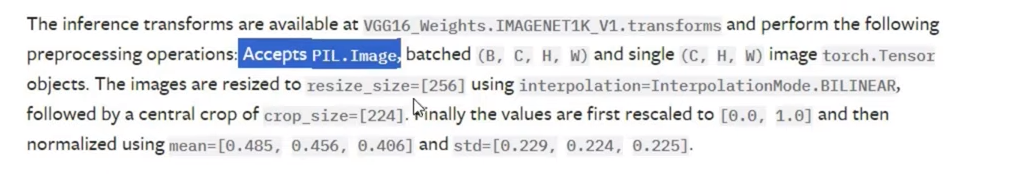

1. basically VGG16 neends a special format of image in input so we need to do some work our data so the we can put it in VGG16
2. PIL image need the np.unit8 data type

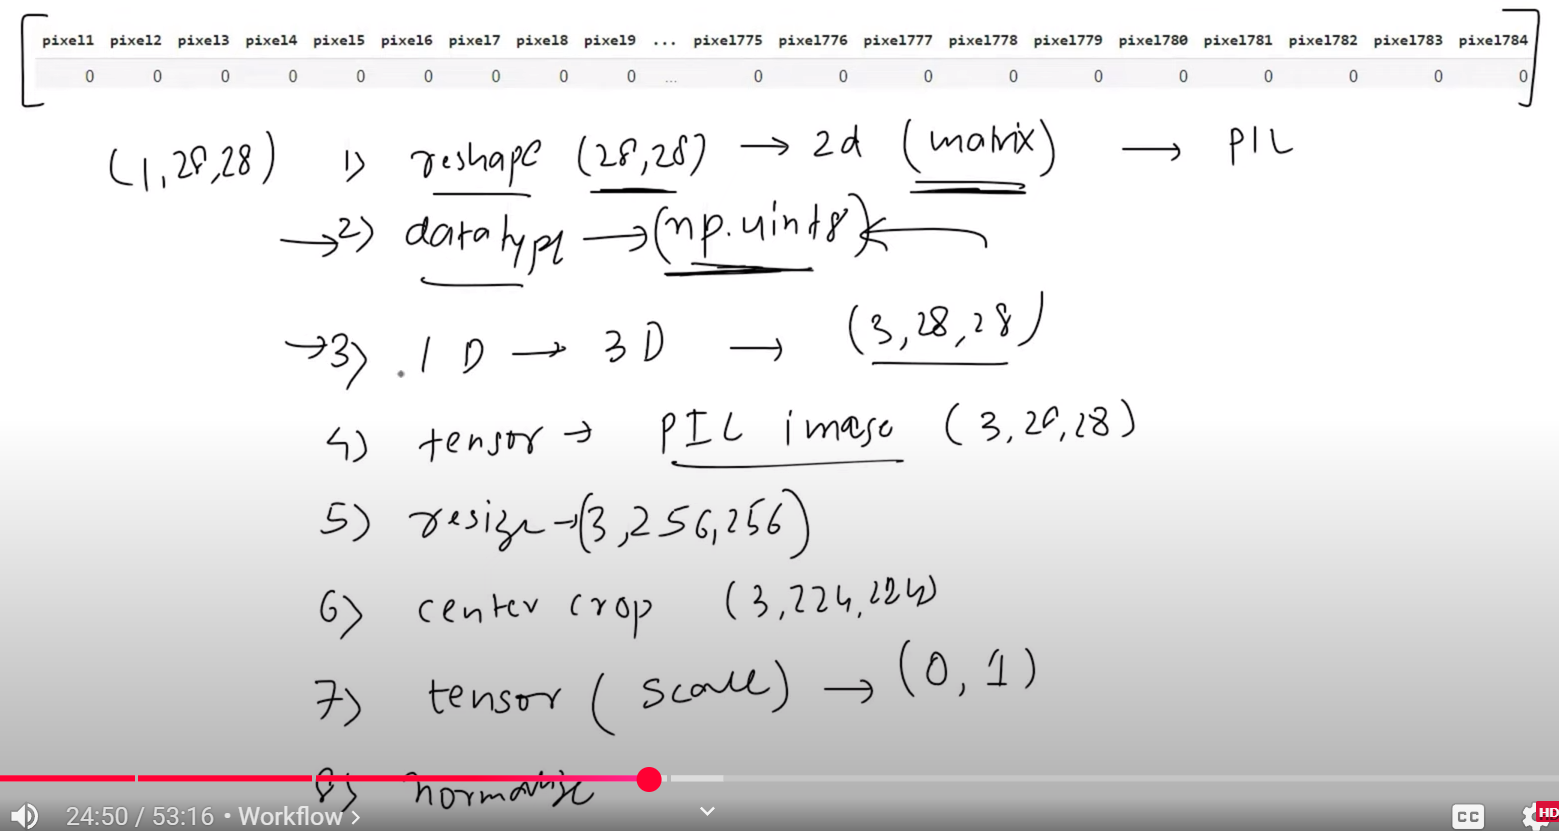

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset ,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device is : {device}')

Device is : cuda


In [ ]:
df = pd.read_csv('/content/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y

,label
0,2
1,9
2,6
3,0
4,3
...,...
59995,9
59996,1
59997,8
59998,8


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state=42)

# Reset indices
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,11,37,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,0,0,0,0,0,3,7,0,0,0,...,174,180,196,235,0,0,255,229,166,0
47996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47997,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
47998,0,0,0,0,0,0,0,2,0,0,...,94,74,0,0,0,0,0,0,0,0


In [ ]:
x_train.shape

(48000, 784)

In [ ]:
y_train

,label
0,5
1,7
2,8
3,5
4,2
...,...
47995,2
47996,7
47997,9
47998,4


In [ ]:
y_train.shape

(48000,)

In [ ]:
#  we will define transformations here but we dont need write them manually will use the librabry of pytorch which will help us to do it
#  but here we are doing transformation from point 5 to 8 mentioned in above pic
from torchvision.transforms import transforms
custom_transform = transforms.Compose([
    transforms.Resize(256), # it will make(3,256 ,256)
    transforms.CenterCrop(224), # it will crop (2,224,224) from center
    transforms.ToTensor(), # it will transform into tensor also scalling will be done here
    transforms.Normalize(mean=[.485,.456,.406],std = [.229,.224,.225])  , # for R G B
])

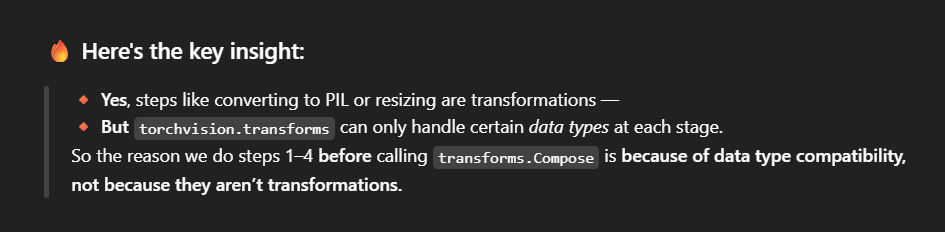

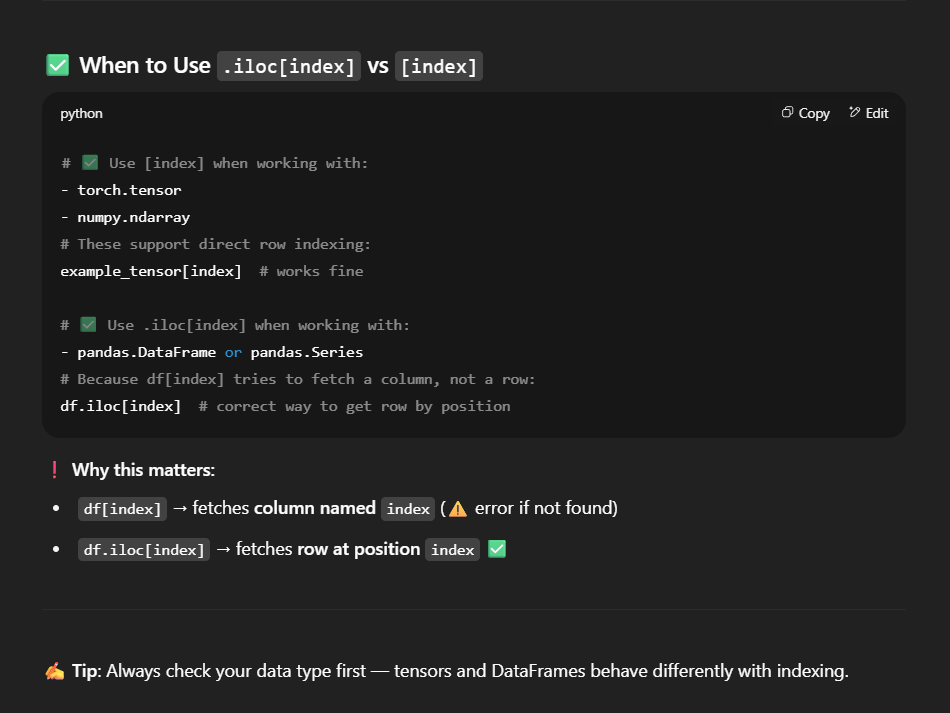

In [ ]:
# now we will define our class of dataset
from PIL import Image
import numpy as np

class CustomDataset(Dataset):

  def __init__(self, features ,labels, transform):
    self.feature = features
    self.labels = labels
    self.transform = transform

  def __len__(self):
    return len(self.feature)  # it will tell about the no of rwos in the datset(x) or features

  def __getitem__(self , index):   # it will give the index to the each row so the each row can be fetched by using index
    # here we will do task from 1 to 4 mentioned above

    # resize to (28,28)
    image = self.feature.iloc[index].values.reshape(28,28)

    # change datatype to np.unit8
    image = image.astype(np.uint8)

    # change black and whilte to colored image
    image = np.stack([image]*3, axis = -1)    # it will stack the same image three one over other
    # axis = -1 ? see with this axis = -1 our image has ( C, H ,W) but for PIL iamge it should be like (H, W,C) so we need to flip the sequence so we use axis = -1

    # convert array to pil image
    image = Image.fromarray(image)

    # tranforms
    image = self.transform(image)

    return image ,torch.tensor(self.labels[index], dtype = torch.long)  # we converted label into tensor here also

In [ ]:
train_dataset = CustomDataset(x_train , y_train , transform = custom_transform)
test_dataset = CustomDataset(x_test , y_test , transform = custom_transform)

In [ ]:
train_loader = DataLoader(train_dataset , batch_size = 32 , shuffle= True)
test_loader = DataLoader(test_dataset , batch_size = 32 , shuffle = False) # keep it mind here shuffle will be false

In [ ]:
# first fetch the pretrained model
import torchvision.models as models

In [ ]:
vgg16 = models.vgg16(pretrained = True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
for param in vgg16.features.parameters():
  param.requires_grad = False   # basically we are freezing the parameters of the feature section

In [ ]:
vgg16.classifier = nn.Sequential(
    nn.Linear(25088 , 1024),
    nn.ReLU(),
    nn.Dropout(p = .3),
    nn.Linear(1024, 512),
    nn.ReLU(),
    nn.Dropout(p = .3),
    nn.Linear(512,10)
)  # we had create our own classifier network

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
vgg16.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
learning_rate = .001
epochs = 10

In [ ]:
lossfunc = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr = learning_rate)  # here our optimizer only update only in parameters of classifier

In [ ]:
# training loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features , batch_labels in train_loader:

    # move data to gpu
    batch_features,batch_labels = batch_features.to(device) , batch_labels.to(device)

    # forward pass
    output = vgg16(batch_features)

    #calcualte loss
    loss = lossfunc(output, batch_labels)

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epoch_loss += loss.item()
  avg_loss = total_epoch_loss / len(train_loader)
  print(f'epoch : {epoch+1} , loss : {avg_loss}')

epoch : 1 , loss : 0.3704430390521884
epoch : 2 , loss : 0.25174239024706185
epoch : 3 , loss : 0.20995756381051614
epoch : 4 , loss : 0.1874163490450786
epoch : 5 , loss : 0.1574779992674788
epoch : 6 , loss : 0.14155223541422554
epoch : 7 , loss : 0.13176809169160333


In [ ]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = vgg16(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)